In [2]:
import pandas as pd
import json
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.decomposition import PCA

C:\Users\kacie\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
with open('grandmasterData.json') as f:
  gdData = f.read()
gdDict = json.loads(gdData)

In [4]:
placements = []
traits = []
augments = []
units = []

for summonerID in gdDict.keys():
  for i in range(len(gdDict[summonerID])):
    for puuid, dataDict in gdDict[summonerID][i].items():
      placements.append(dataDict["placement"])
      traits.append(dataDict["traits"])
      augments.append(dataDict["augments"])
      units.append(dataDict["units"])
    # break
  # break
df = pd.DataFrame()
df["placement"] = placements
df["traits"] = traits
df["augments"] = augments
df["units"] = units

df.head()

,placement,traits,augments,units
0,4,"[Set10_Brawler, Set10_Classical, Set10_Country...","[TFT9_Augment_DravenSpoilsOfWar, TFT9_Augment_...","[TFT10_Bard, TFT10_Aphelios, TFT10_MissFortune..."
1,8,"[Set10_Brawler, Set10_Breakout, Set10_Dazzler,...","[TFT7_Augment_AFK, TFT10_Augment_Determinedinv...","[TFT10_KSante, TFT10_Senna, TFT10_Lulu, TFT10_..."
2,3,"[Set10_8Bit, Set10_Brawler, Set10_CrowdDive, S...","[TFT9_Augment_OneTwosThree, TFT9_Augment_Great...","[TFT10_MissFortune, TFT10_Sett, TFT10_Zac, TFT..."
3,6,"[Set10_CrowdDive, Set10_Edgelord, Set10_Execut...","[TFT9_Augment_CustomerIsAlwaysRight, TFT9_Augm...","[TFT10_Lillia, TFT10_Gnar, TFT10_Kayle, TFT10_..."
4,7,"[Set10_Deadeye, Set10_Guardian, Set10_Hyperpop...","[TFT9_Augment_SilverSpoon, TFT9_Augment_Pandor...","[TFT10_Lillia, TFT10_Kennen, TFT10_Seraphine, ..."


In [5]:
mlb = MultiLabelBinarizer()
df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('traits')),
                                            columns=mlb.classes_,
                                            index=df.index).add_prefix("trait_"))

df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('units')),
                                            columns=mlb.classes_,
                                            index=df.index).add_prefix("unit_"))

df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('augments')),
                                            columns=mlb.classes_,
                                            index=df.index).add_prefix("augment_"))
df.head()

,placement,trait_Astro,trait_Battlecast,trait_Blaster,trait_Chrono,trait_Cybernetic,trait_DarkStar,trait_Demolitionist,trait_Infiltrator,trait_ManaReaver,...,augment_TFT9_Augment_TiniestTitan,augment_TFT9_Augment_TiniestTitanPlus,augment_TFT9_Augment_TonsOfStats,augment_TFT9_Augment_TwoHealthy,augment_TFT9_Augment_UnleashedArcana,augment_TFT9_Augment_WhatDoesntKillYou,augment_TFT9_Augment_WhatTheForge,augment_TFT9_Augment_YouHaveMyBow,augment_TFT9_Augment_YouHaveMySword,augment_TFT9_Augment_YoungAndWildAndFree
0,4,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
column_indices = list(range(1, 81))

col_sums = df.iloc[:, column_indices].sum()
column_sums_sorted = col_sums.sort_values(ascending=False)
print(column_sums_sorted)

column_sums_filtered = column_sums_sorted[column_sums_sorted >= 75]

trait_Set10_Guardian      30557
trait_Set10_Sentinel      28545
trait_Set10_Fighter       26425
trait_Set10_Brawler       25959
trait_Set10_TrueDamage    21957
                          ...  
trait_TFT11_Lovers           13
trait_Starship               11
trait_TFT11_Artist           11
trait_Mercenary              10
trait_TFT11_Great             9
Length: 80, dtype: int64


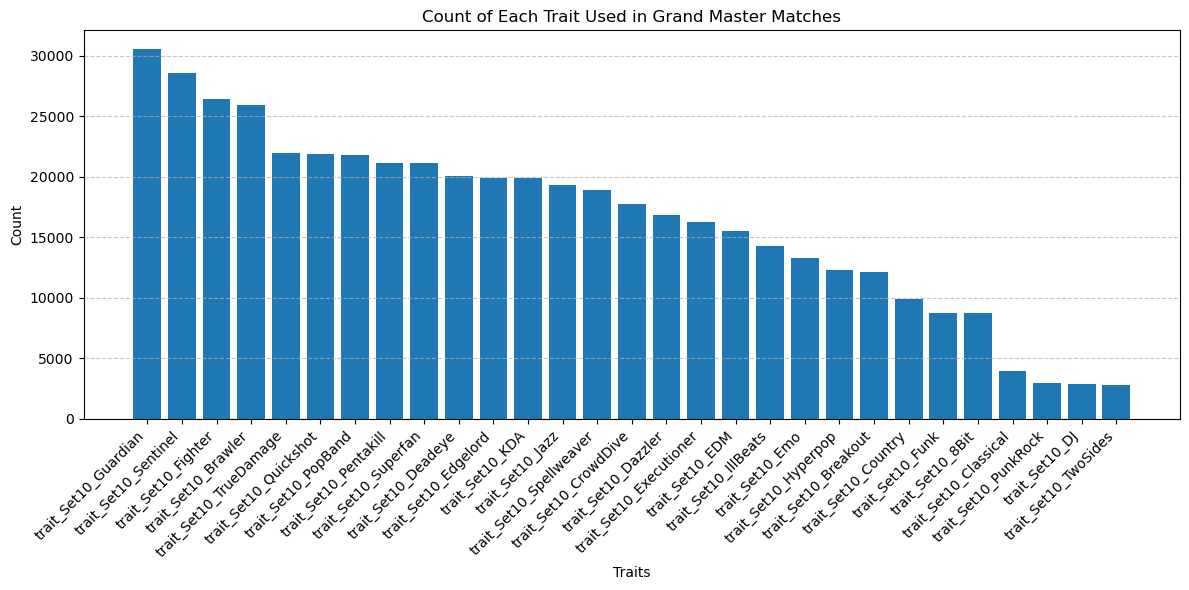

In [9]:
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(column_sums_filtered)), column_sums_filtered)

plt.xticks(range(len(column_sums_filtered)), column_sums_filtered.index, rotation=45, ha='right')

plt.title('Count of Traits Used in Grand Master Matches')
plt.xlabel('Traits')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

unit_TFT10_Neeko          17872
unit_TFT10_Lillia         17304
unit_TFT10_Ekko           16079
unit_TFT10_MissFortune    15353
unit_TFT10_Sett           15304
                          ...  
unit_TFT11_Shen               4
unit_TFT11_Irelia             4
unit_TFT11_Darius             3
unit_TFT11_Jax                3
unit_TFT11_Ahri               1
Length: 178, dtype: int64


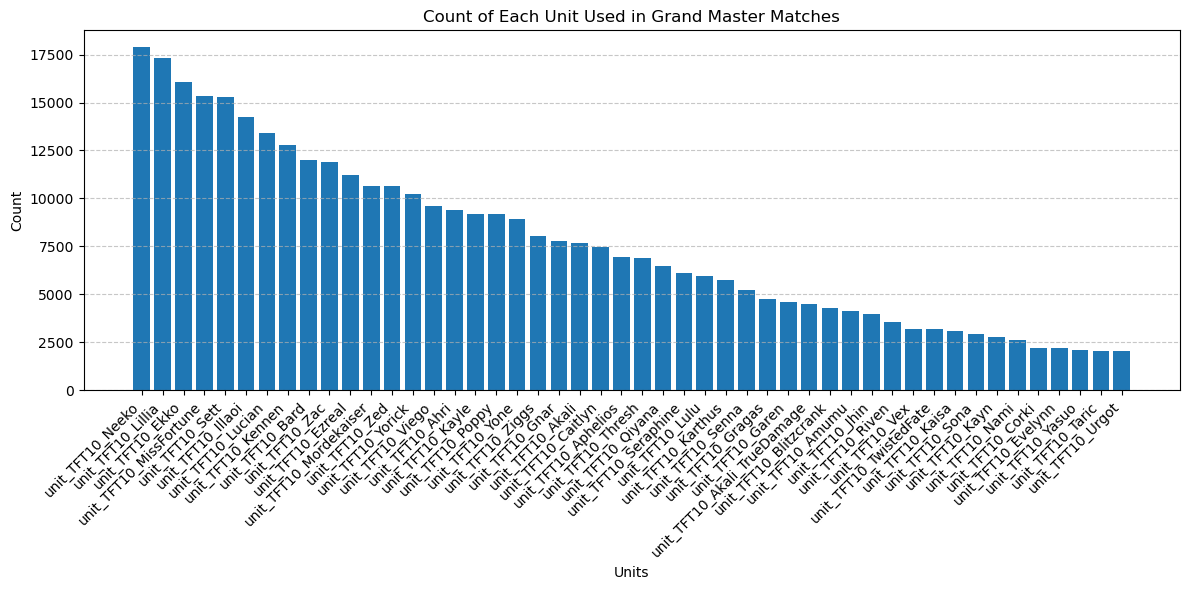

In [17]:
unit_cols = df.filter(like='unit')

unit_sums = unit_cols.sum()
unit_column_sums_sorted = unit_sums.sort_values(ascending=False)
print(unit_column_sums_sorted)

unit_column_sums_filtered = unit_column_sums_sorted[unit_column_sums_sorted >= 2000]

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(unit_column_sums_filtered)), unit_column_sums_filtered)

plt.xticks(range(len(unit_column_sums_filtered)), unit_column_sums_filtered.index, rotation=45, ha='right')

plt.title('Count of Units Used in Grand Master Matches')
plt.xlabel('Units')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

augment_TFT9_Augment_JeweledLotus           3169
augment_TFT10_Augment_InspiringEpitaph      2832
augment_TFT10_Augment_Vampirism             2765
augment_TFT9_Augment_GreaterJeweledLotus    2574
augment_TFT9_Augment_BigGrabBag             2330
                                            ... 
augment_TFT11_Augment_BrawlerCrest             1
augment_TFT11_Augment_Behemoth                 1
augment_TFT11_Augment_AtWhatCost               1
augment_TFT11_Augment_ArcanistCrest            1
augment_TFT11_Augment_BrawlerCrown             1
Length: 243, dtype: int64


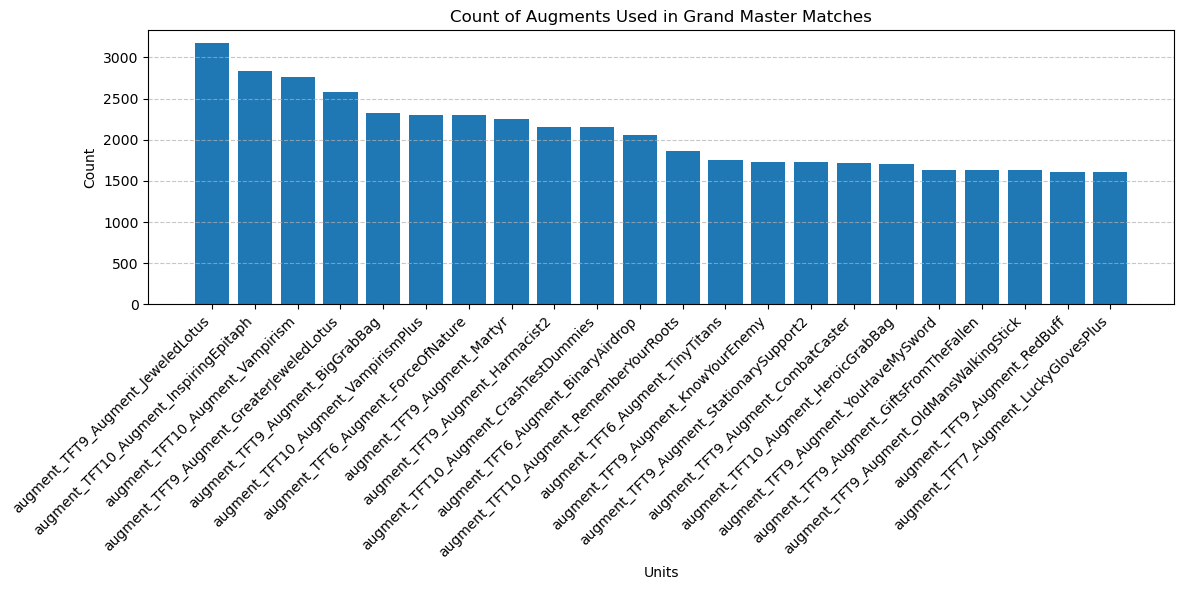

In [76]:
augment_cols = df.filter(like='augment')

augment_sums = augment_cols.sum()
augment_column_sums_sorted = augment_sums.sort_values(ascending=False)
print(augment_column_sums_sorted)

augment_column_sums_filtered = augment_column_sums_sorted[augment_column_sums_sorted >= 1600]

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(augment_column_sums_filtered)), augment_column_sums_filtered)

plt.xticks(range(len(augment_column_sums_filtered)), augment_column_sums_filtered.index, rotation=45, ha='right')

plt.title('Count of Augments Used in Grand Master Matches')
plt.xlabel('Augments')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [22]:
top4 = df[df['placement'] <= 4]

In [78]:
def makeplot_top4(str):
    df = top4
    cols = df.filter(like=f'{str}')

    cols_sums = cols.sum()
    column_sums_sorted = cols_sums.sort_values(ascending=False)
    print(column_sums_sorted)

    column_sums_filtered = column_sums_sorted.head(15)

    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(column_sums_filtered)), column_sums_filtered)

    plt.xticks(range(len(column_sums_filtered)), column_sums_filtered.index, rotation=45, ha='right')

    plt.title(f'Count of Top 15 {str.capitalize()}s Used by Top 4 Winners in Grand Master Matches')
    plt.xlabel(f'{str.capitalize()}')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

trait_Set10_Guardian     16122
trait_Set10_Sentinel     14345
trait_Set10_Fighter      12918
trait_Set10_Brawler      12889
trait_Set10_Quickshot    11642
                         ...  
trait_TFT11_Lovers           8
trait_TFT11_Artist           8
trait_Starship               8
trait_Mercenary              6
trait_TFT11_Great            6
Length: 80, dtype: int64


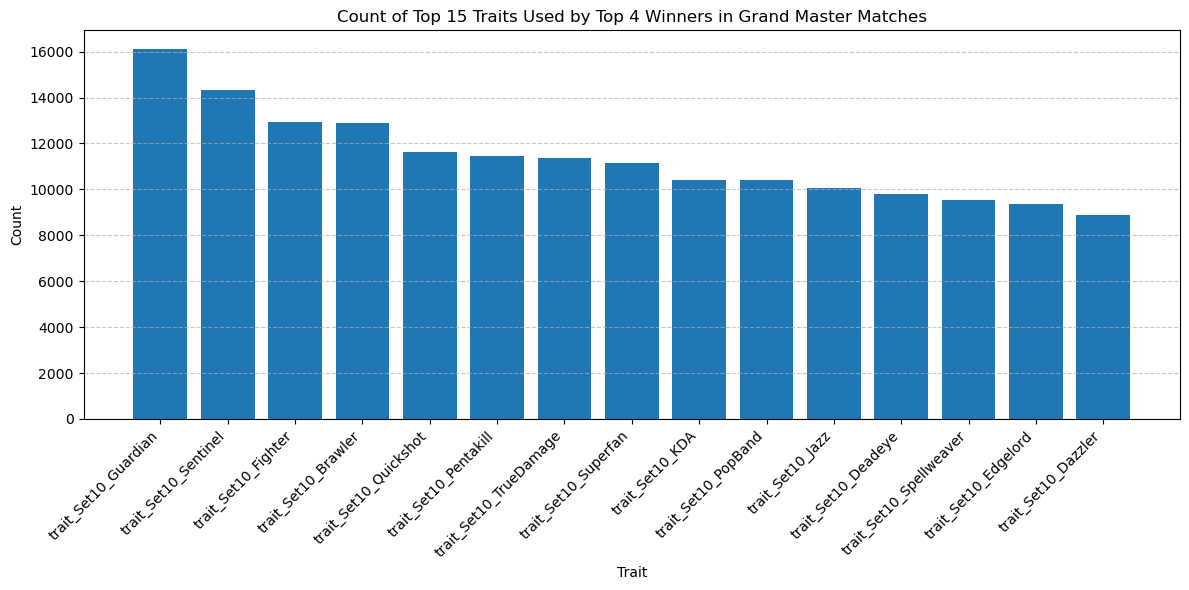

In [79]:
makeplot_top4('trait')

unit_TFT10_Neeko       9633
unit_TFT10_Lillia      9351
unit_TFT10_Illaoi      8817
unit_TFT10_Lucian      8575
unit_TFT10_Ekko        8264
                       ... 
unit_TFT11_Yasuo          1
unit_TFT11_Jax            1
unit_TFT11_Darius         0
unit_TFT3_Lucian          0
unit_TFT11_Tristana       0
Length: 178, dtype: int64


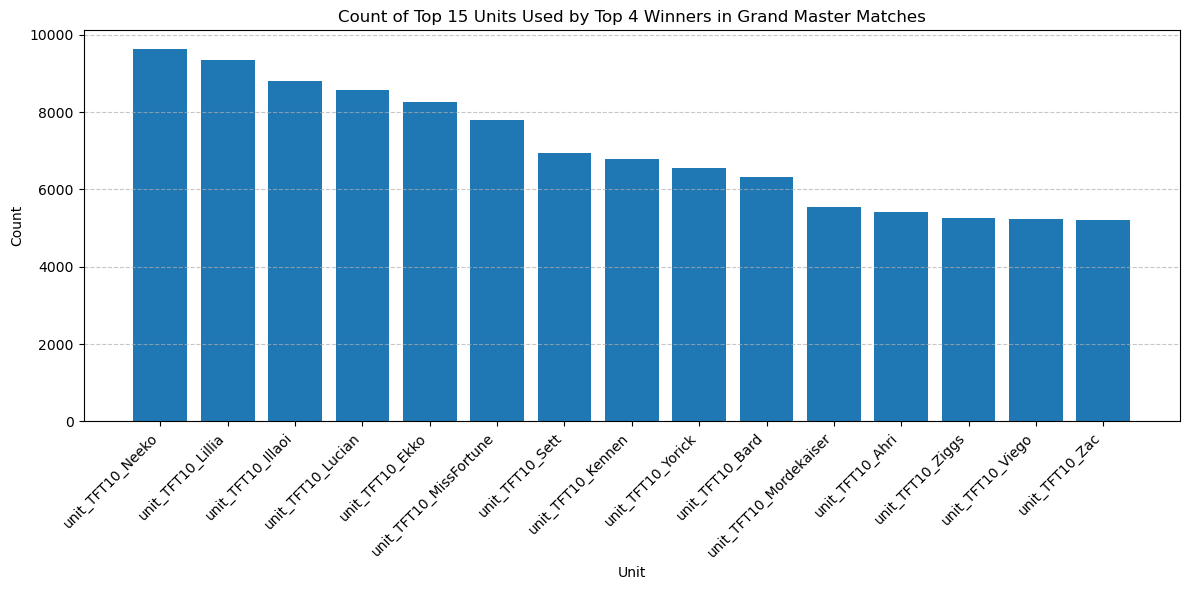

In [80]:
makeplot_top4('unit')

augment_TFT9_Augment_JeweledLotus           1547
augment_TFT10_Augment_InspiringEpitaph      1483
augment_TFT10_Augment_Vampirism             1377
augment_TFT9_Augment_GreaterJeweledLotus    1351
augment_TFT10_Augment_VampirismPlus         1230
                                            ... 
augment_TFT11_Augment_DragonlordCrest          0
augment_TFT11_Augment_BrawlerCrest             0
augment_TFT11_Augment_AtWhatCost               0
augment_TFT11_Augment_ArcanistCrest            0
augment_TFT11_Augment_Trickshot                0
Length: 243, dtype: int64


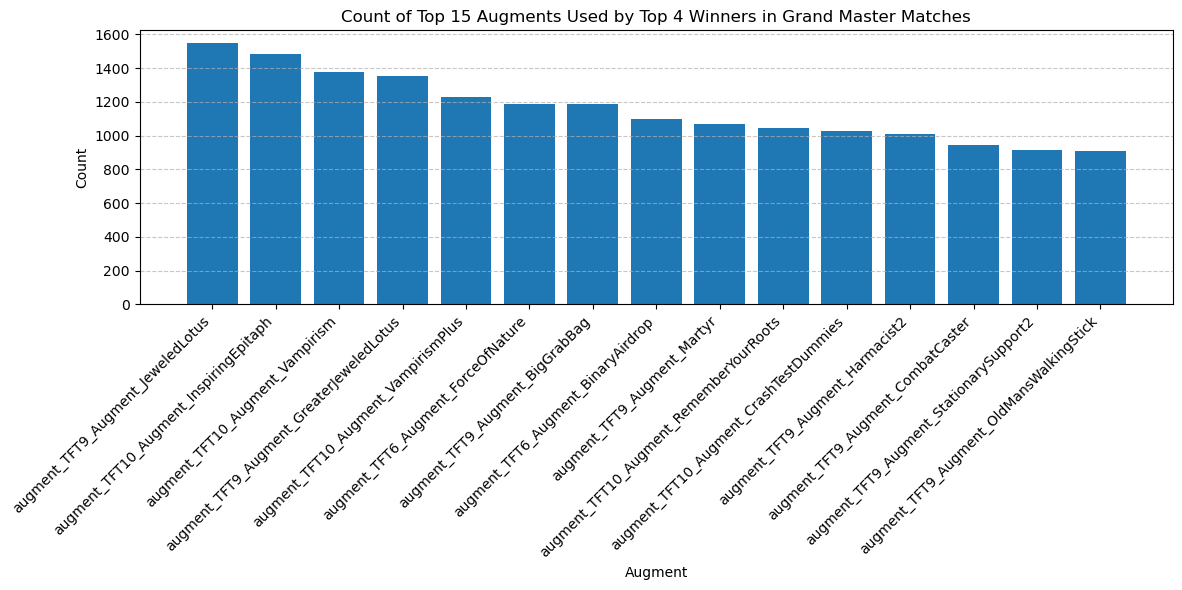

In [81]:
makeplot_top4('augment')

In [82]:
top1 = df[df['placement'] <= 1]
top1

,placement,trait_Astro,trait_Battlecast,trait_Blaster,trait_Chrono,trait_Cybernetic,trait_DarkStar,trait_Demolitionist,trait_Infiltrator,trait_ManaReaver,...,augment_TFT9_Augment_TiniestTitan,augment_TFT9_Augment_TiniestTitanPlus,augment_TFT9_Augment_TonsOfStats,augment_TFT9_Augment_TwoHealthy,augment_TFT9_Augment_UnleashedArcana,augment_TFT9_Augment_WhatDoesntKillYou,augment_TFT9_Augment_WhatTheForge,augment_TFT9_Augment_YouHaveMyBow,augment_TFT9_Augment_YouHaveMySword,augment_TFT9_Augment_YoungAndWildAndFree
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45882,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
45888,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
45899,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45909,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
def makeplot_top1(str):
    df = top1
    cols = df.filter(like=f'{str}')

    cols_sums = cols.sum()
    column_sums_sorted = cols_sums.sort_values(ascending=False)
    print(column_sums_sorted)

    column_sums_filtered = column_sums_sorted.head(15)

    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(column_sums_filtered)), column_sums_filtered)

    plt.xticks(range(len(column_sums_filtered)), column_sums_filtered.index, rotation=45, ha='right')

    plt.title(f'Count of Top 15 {str.capitalize()}s Used by Top 1 Winner in Grand Master Matches')
    plt.xlabel(f'{str.capitalize()}')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

trait_Set10_Guardian      3776
trait_Set10_Brawler       3696
trait_Set10_Quickshot     3691
trait_Set10_Fighter       3489
trait_Set10_Jazz          3368
                          ... 
trait_Set3_Blademaster       2
trait_TFT11_Reaper           2
trait_TFT11_Dryad            2
trait_Blaster                2
trait_Starship               2
Length: 80, dtype: int64


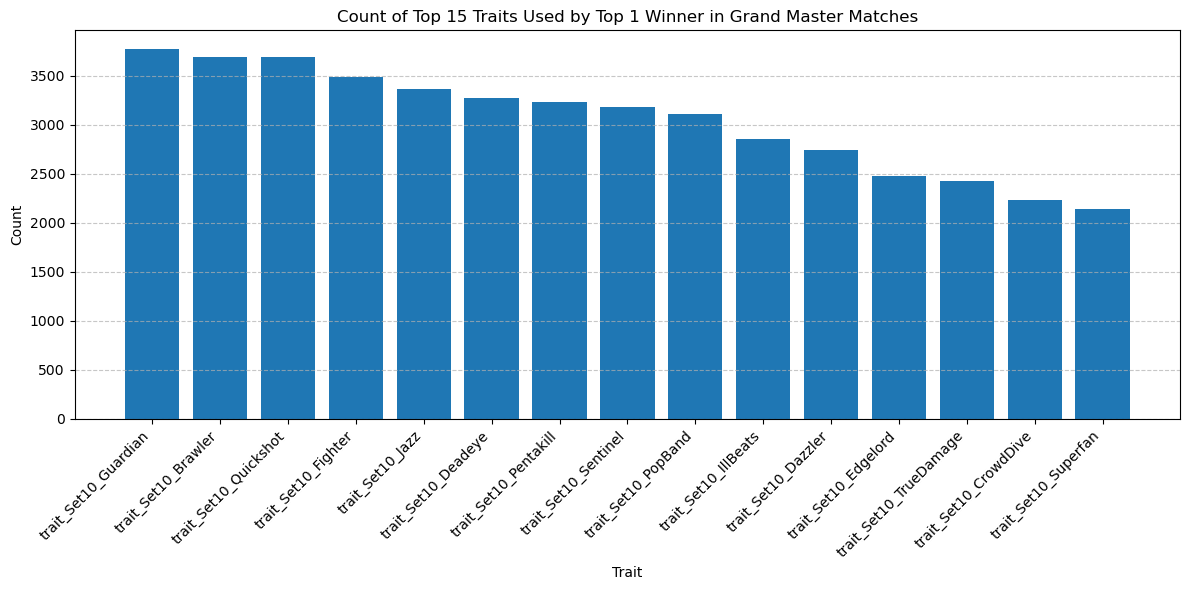

In [84]:
makeplot_top1('trait')

unit_TFT10_Lucian         3136
unit_TFT10_Illaoi         2852
unit_TFT10_MissFortune    2736
unit_TFT10_Bard           2205
unit_TFT10_Sett           2170
                          ... 
unit_TFT3_Mordekaiser        0
unit_TFT11_Volibear          0
unit_TFT11_Amumu             0
unit_TFT11_Tristana          0
unit_TFT11_Darius            0
Length: 178, dtype: int64


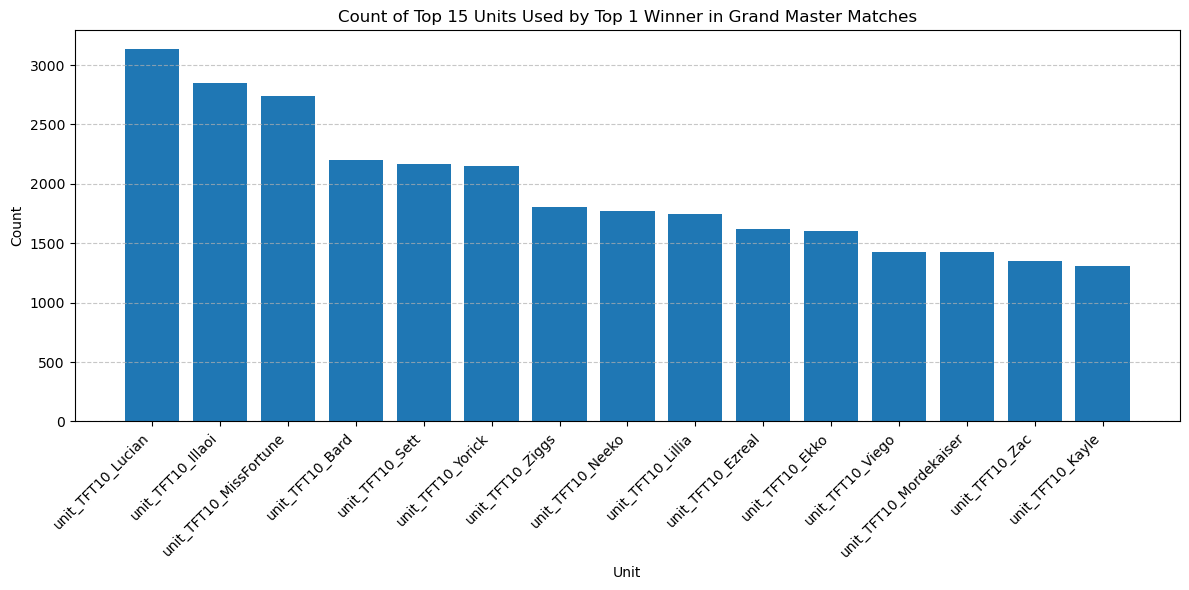

In [85]:
makeplot_top1('unit')

augment_TFT10_Augment_InspiringEpitaph      421
augment_TFT9_Augment_JeweledLotus           403
augment_TFT10_Augment_Vampirism             394
augment_TFT10_Augment_VampirismPlus         379
augment_TFT9_Augment_GreaterJeweledLotus    328
                                           ... 
augment_TFT11_Augment_NeekoCarry              0
augment_TFT11_Augment_PorcelainCrest          0
augment_TFT9_Augment_ACutAboveHR              0
augment_TFT9_Augment_PhreakyFridayHR          0
augment_TFT11_Augment_DragonSpirit            0
Length: 243, dtype: int64


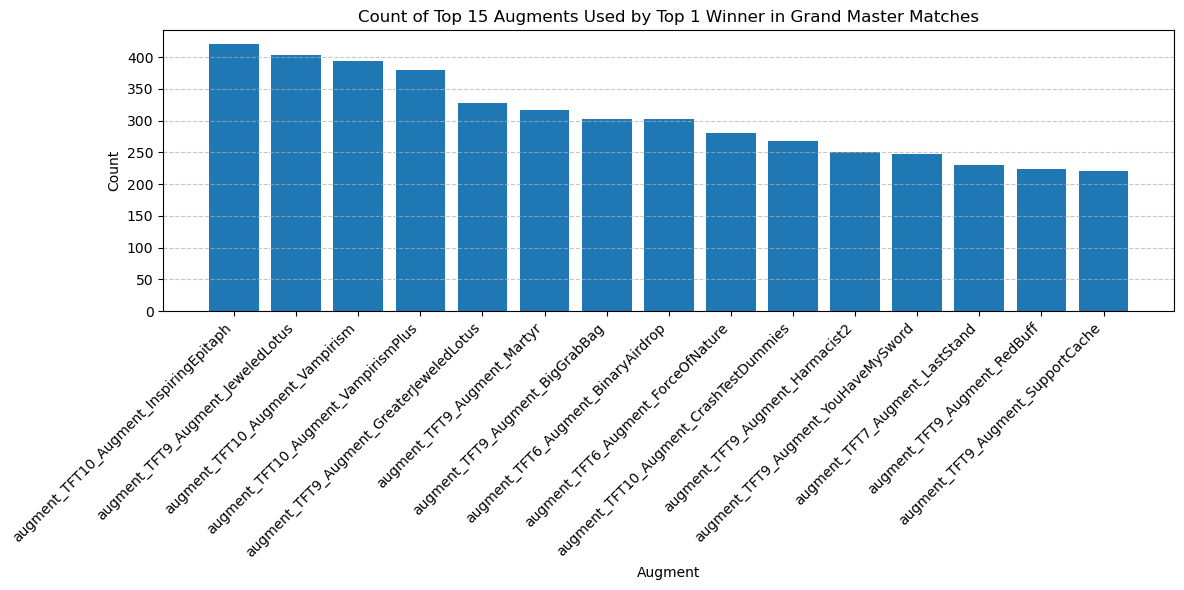

In [86]:
makeplot_top1('augment')